This code aims to make a comparison between the pennylane classical shadows package and the qiskit classical shadows package implement by @dqenani. This qiskit classical shadows package is adapted from both the https://pennylane.ai/qml/demos/tutorial_classical_shadows and the original theory behind Classical Shadows from from https://github.com/momohuang/predicting-quantum-properties.
    
The qiskit classical shadows package is optimized to the qiskit libraries and gate sets and is comptabile with most quantum programs developed in qiskit


In [1]:
import PennylaneClassicalShadows as pcs
import pennylane as qml
import numpy as np
import matplotlib.pyplot as plt
import time

In [2]:
import QiskitClassicalShadows as qcs

from qiskit import QuantumCircuit, transpile, Aer
from qiskit.providers.aer import QasmSimulator

In [3]:
#This function creates a a quantum system to test the classical shadows protocol on by rotating the basis states
#by the Ry Unitary operator and then calculating a variety of classical shadows of different sizes
p_n_qubits = 2

dev = qml.device("default.qubit", wires = p_n_qubits, shots = 1)

@qml.qnode(dev)
def local_qubit_rotation_circuit(params, **kawargs):
    observables = kawargs.pop("observables")
    
    for w in dev.wires:
        qml.RY(params[w], wires = w)
        
    return [qml.expval(o) for o in observables]

p_elapsed_times = []
p_shadows = []

params = np.random.randn(2)
p_snapshot_range = [10, 100, 1000, 10000]
for p_num_snapshots in p_snapshot_range:
    start = time.time()
    p_shadow = pcs.calculate_classical_shadow(local_qubit_rotation_circuit, params, p_num_snapshots, p_n_qubits)
    p_elapsed_times.append(time.time() - start)
    p_shadows.append(p_shadow)

#The classical shadow of size 10 is displayed below
print("Pennylane Shadow (Size 10) of Ry Rotation state")
print(p_shadows[0][0])
print(p_shadows[0][1])

Pennylane Shadow (Size 10) of Ry Rotation state
[[ 1.  1.]
 [ 1.  1.]
 [ 1.  1.]
 [ 1.  1.]
 [ 1.  1.]
 [ 1.  1.]
 [ 1. -1.]
 [ 1.  1.]
 [ 1.  1.]
 [-1. -1.]]
[[2 2]
 [1 2]
 [0 1]
 [2 0]
 [0 2]
 [1 0]
 [2 0]
 [1 2]
 [0 1]
 [1 1]]


In [4]:
q_n_qubits = 2

q_elapsed_times = []
q_shadows = []

params = np.random.randn(q_n_qubits)
q_snapshot_range =[10, 100, 1000, 10000]
circuits = [QuantumCircuit(q_n_qubits), QuantumCircuit(q_n_qubits), QuantumCircuit(q_n_qubits), QuantumCircuit(q_n_qubits)]

for q_num_snapshots, circ in zip(q_snapshot_range,circuits):
    for n in range(q_n_qubits):
        circ.ry(params[n], n)
        
    start = time.time()
    q_shadow = qcs.calc_shadow(circ, q_num_snapshots, q_n_qubits)
    q_elapsed_times.append(time.time() - start)
    q_shadows.append(q_shadow)

print("Qiskit Shadow (Size 10) of Ry Rotation state")
print(q_shadows[0][0])
print(q_shadows[0][1])

Qiskit Shadow (Size 10) of Ry Rotation state
[[ 1. -1.]
 [ 1.  1.]
 [ 1.  1.]
 [ 1.  1.]
 [ 1. -1.]
 [-1. -1.]
 [-1.  1.]
 [-1. -1.]
 [ 1.  1.]
 [ 1.  1.]]
[[1 2]
 [0 1]
 [1 2]
 [2 2]
 [0 2]
 [0 2]
 [1 0]
 [0 0]
 [0 2]
 [1 2]]


Text(0.5, 0, 'Shadow Size')

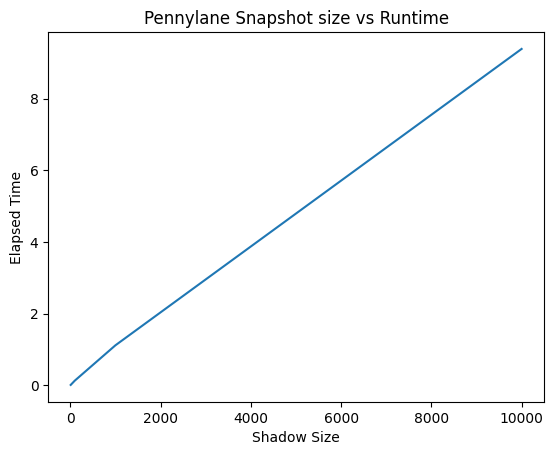

In [5]:
#The following plot displays the efficiency of calculating a quantum states classical shadow in terms of shadow size
plt.plot(p_snapshot_range, p_elapsed_times)
plt.title("Pennylane Snapshot size vs Runtime")
plt.ylabel("Elapsed Time")
plt.xlabel("Shadow Size")

Text(0.5, 0, 'Shadow Size')

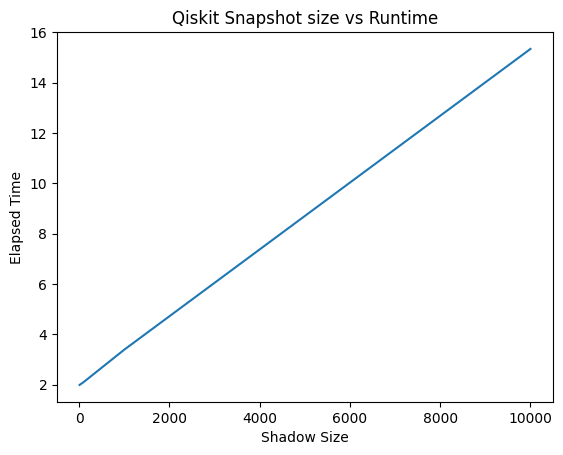

In [6]:
plt.plot(q_snapshot_range, q_elapsed_times)
plt.title("Qiskit Snapshot size vs Runtime")
plt.ylabel("Elapsed Time")
plt.xlabel("Shadow Size")

In [7]:
#This function creates a bell state to test the Classical Shadow Reconstruction of States
p_num_qubits = 2

dev = qml.device("default.qubit", wires = p_num_qubits, shots = 1)

@qml.qnode(dev)
def bell_state_circuit(params, **kawargs):
    
    observables = kawargs.pop("observables")
    qml.Hadamard(0)
    qml.CNOT(wires = [0,1])
    
    return [qml.expval(o) for o in observables]

p_num_snapshots = 10000
params = []

p_shadow = pcs.calculate_classical_shadow(bell_state_circuit,params,p_num_snapshots,p_num_qubits)

print("Pennylane Bell State Shadow of size 10,000")
print("Here we have the results of the measurements of the qubits in the computational basis:")
print(p_shadow[0])
print("Here we have the unitary operator the acted upon each respective qubit(0:X,Y:1,Z:2):")
print(p_shadow[1])

Pennylane Bell State Shadow of size 10,000
Here we have the results of the measurements of the qubits in the computational basis:
[[-1. -1.]
 [-1.  1.]
 [ 1. -1.]
 ...
 [ 1. -1.]
 [ 1.  1.]
 [ 1.  1.]]
Here we have the unitary operator the acted upon each respective qubit(0:X,Y:1,Z:2):
[[2 1]
 [1 1]
 [1 2]
 ...
 [2 0]
 [0 1]
 [0 1]]


In [8]:
q_num_qubits = 2

BS_Circ = QuantumCircuit(q_num_qubits)
BS_Circ.h(0)
BS_Circ.cnot(0,1)

q_num_snapshots = 10000

q_shadow = qcs.calc_shadow(BS_Circ, q_num_snapshots, q_num_qubits)

print("Qiskit Bell State Shadow of size 10,000")
print("Here we have the results of the measurements of the qubits in the computational basis:")
print(q_shadow[0])
print("Here we have the unitary operator the acted upon each respective qubit(0:X,Y:1,Z:2):")
print(q_shadow[1])

Qiskit Bell State Shadow of size 10,000
Here we have the results of the measurements of the qubits in the computational basis:
[[ 1. -1.]
 [ 1.  1.]
 [ 1.  1.]
 ...
 [ 1. -1.]
 [ 1.  1.]
 [ 1.  1.]]
Here we have the unitary operator the acted upon each respective qubit(0:X,Y:1,Z:2):
[[0 2]
 [2 1]
 [2 2]
 ...
 [1 2]
 [2 2]
 [0 2]]


In [9]:
#Here the Density Matrix of the Bell State is estimated...this represents one definition of the "Classical Shadow"

p_shadow_state = pcs.shadow_state_reconstruction(p_shadow)
print('Pennylane Shadow of size 10,000 (Density Matrix)')
print(np.round(p_shadow_state,decimals = 6))

Pennylane Shadow of size 10,000 (Density Matrix)
[[ 0.512875+0.j        0.012675+0.0021j   -0.00705 +0.005625j
   0.50445 -0.014175j]
 [ 0.012675-0.0021j   -0.012875+0.j        0.00135 -0.009675j
  -0.0021  -0.003375j]
 [-0.00705 -0.005625j  0.00135 +0.009675j -0.001025+0.j
  -0.021075+0.00345j ]
 [ 0.50445 +0.014175j -0.0021  +0.003375j -0.021075-0.00345j
   0.501025+0.j      ]]


In [10]:
q_shadow_state = qcs.reconstruction(q_shadow)
print('Qiskit Shadow of size 10,000 (Density Matrix)')
print(np.round(q_shadow_state,decimals = 6)) 

Qiskit Shadow of size 10,000 (Density Matrix)
[[ 0.51235 +0.0000e+00j -0.00555 +2.0250e-02j -0.001275-1.6725e-02j
   0.494775+1.1025e-02j]
 [-0.00555 -2.0250e-02j -0.0017  +0.0000e+00j -0.021375-1.7325e-02j
   0.010425-7.5000e-05j]
 [-0.001275+1.6725e-02j -0.021375+1.7325e-02j -0.00455 +0.0000e+00j
   0.00615 -5.8500e-03j]
 [ 0.494775-1.1025e-02j  0.010425+7.5000e-05j  0.00615 +5.8500e-03j
   0.4939  +0.0000e+00j]]


In [11]:
bell_state = np.array([[0.5,0,0,0.5],[0,0,0,0],[0,0,0,0],[0.5,0,0,0.5]])

print("The exact Density Matrix of the Bell State for comparison")
print(bell_state)

The exact Density Matrix of the Bell State for comparison
[[0.5 0.  0.  0.5]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0. ]
 [0.5 0.  0.  0.5]]


In [12]:
print("The operator norm between the Pennylane classical shadow and the density matrix")
print(pcs.operator_norm(p_shadow_state - bell_state))

The operator norm between the Pennylane classical shadow and the density matrix
0.049015201723546946


In [13]:
print("The operator norm between the Qiskit classical shadow and the density matrix")
print(qcs.op_norm(q_shadow_state - bell_state))

The operator norm between the Qiskit classical shadow and the density matrix
0.06189519367446879


Text(0, 0.5, 'Distance')

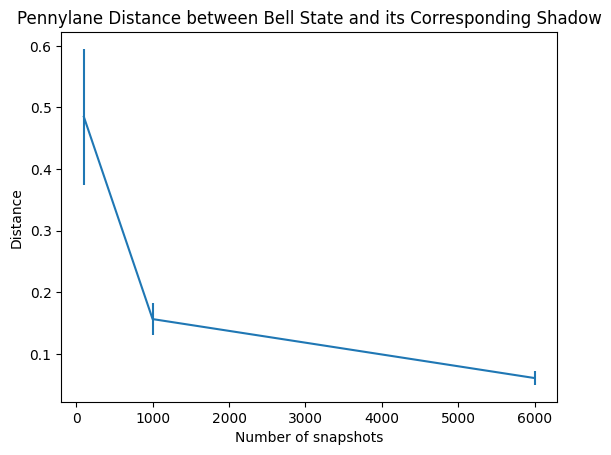

In [14]:
#A variety of classical shadows are calculated to see how the operator norm changes with Shadow Size
p_number_runs = 10
p_snapshot_range = [100, 1000, 6000]
p_distances = np.zeros((p_number_runs,len(p_snapshot_range)))

for i in range(p_number_runs):
    for j, p_num_snapshots in enumerate(p_snapshot_range):
        p_shadow = pcs.calculate_classical_shadow(bell_state_circuit, params, p_num_snapshots, p_num_qubits)
        
        p_shadow_state = pcs.shadow_state_reconstruction(p_shadow)
        
        p_distances[i][j] = pcs.operator_norm(p_shadow_state - bell_state)
        
plt.errorbar(p_snapshot_range, np.mean(p_distances, axis = 0), yerr = np.std(p_distances, axis = 0))
plt.title("Pennylane Distance between Bell State and its Corresponding Shadow")
plt.xlabel("Number of snapshots")
plt.ylabel("Distance")

Text(0, 0.5, 'Distance')

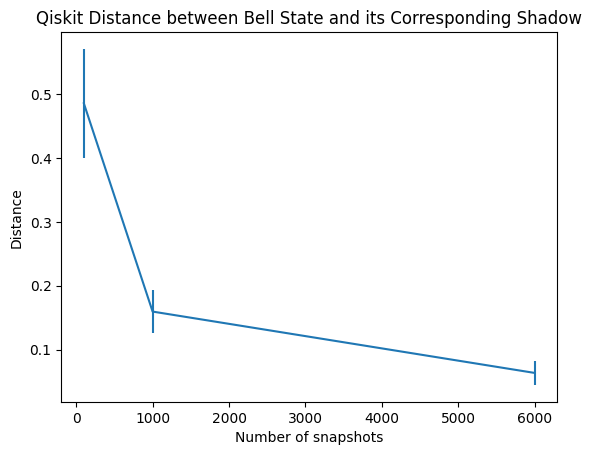

In [15]:
q_number_runs = 10
q_snapshot_range = [100, 1000, 6000]
q_distances = np.zeros((q_number_runs,len(q_snapshot_range)))

for i in range(q_number_runs):
    for j, q_num_snapshots in enumerate(q_snapshot_range):
        q_shadow = qcs.calc_shadow(BS_Circ, q_num_snapshots, q_num_qubits)
        
        q_shadow_state = qcs.reconstruction(q_shadow)
        
        q_distances[i][j] = qcs.op_norm(q_shadow_state - bell_state)
        
plt.errorbar(q_snapshot_range, np.mean(q_distances, axis = 0), yerr = np.std(q_distances, axis = 0))
plt.title("Qiskit Distance between Bell State and its Corresponding Shadow")
plt.xlabel("Number of snapshots")
plt.ylabel("Distance")

In [17]:
#This function creates a groundstate Majumdar Gosh Model and calculates its classical shadow with size 10,000
num_qubits = 10
dev = qml.device("default.qubit", wires=num_qubits, shots=1)

@qml.qnode(dev)
def Mag_Gosh_circuit(params, **kawargs):
    observables = kawargs.pop("observables")
    for w in range(0, num_qubits, 2):
        qml.Hadamard(wires=w)
        qml.X(wires = w + 1)
        qml.PauliZ(wires = w)
        qml.CNOT(wires=[w, w + 1])
        qml.X(wires = w)
        qml.X(wires = w + 1)
    return [qml.expval(o) for o in observables]

num_snapshots = 10000
params = []

mag_gosh_shadow = pcs.calculate_classical_shadow(Mag_Gosh_circuit,params,num_snapshots,num_qubits)

print("Pennylane Majumdar Gosh Model Classical Shadow size 10,000")
print("Here we have the results of the measurements of the qubits in the computational basis:")
print(mag_gosh_shadow[0])
print("Here we have the unitary operator the acted upon each respective qubit(0:X,Y:1,Z:2):")
print(mag_gosh_shadow[1])

Pennylane Majumdar Gosh Model Classical Shadow size 10,000
Here we have the results of the measurements of the qubits in the computational basis:
[[ 1.  1.  1. ...  1. -1.  1.]
 [ 1.  1. -1. ... -1. -1. -1.]
 [ 1. -1. -1. ...  1.  1.  1.]
 ...
 [-1.  1. -1. ... -1.  1. -1.]
 [-1.  1. -1. ...  1. -1.  1.]
 [ 1. -1.  1. ...  1.  1. -1.]]
Here we have the unitary operator the acted upon each respective qubit(0:X,Y:1,Z:2):
[[2 1 2 ... 2 2 1]
 [0 1 1 ... 2 0 1]
 [2 0 2 ... 0 1 1]
 ...
 [2 1 2 ... 0 2 0]
 [1 0 0 ... 0 2 1]
 [2 0 1 ... 1 1 0]]


In [18]:
system_size = 10

MG_circuit = QuantumCircuit(system_size)
for i in range(0, system_size, 2): #Was previously for i in range(0, 10, 2)
            MG_circuit.h(i)
            MG_circuit.x(i+1)
            MG_circuit.z(i)
            MG_circuit.cnot(i,i+1)
            MG_circuit.x(i)
            MG_circuit.x(i+1)

num_snapshots = 10000


MG_shadow = qcs.calc_shadow(MG_circuit, num_snapshots, system_size)

print("Qiskit Majumdar Gosh Model Classical Shadow size 10,000")
print("Here we have the results of the measurements of the qubits in the computational basis:")
print(MG_shadow[0])
print("Here we have the unitary operator the acted upon each respective qubit(0:X,Y:1,Z:2):")
print(MG_shadow[1])

Qiskit Majumdar Gosh Model Classical Shadow size 10,000
Here we have the results of the measurements of the qubits in the computational basis:
[[-1.  1. -1. ... -1.  1. -1.]
 [-1.  1. -1. ...  1.  1. -1.]
 [ 1. -1. -1. ... -1. -1. -1.]
 ...
 [-1.  1. -1. ...  1.  1.  1.]
 [ 1. -1.  1. ... -1.  1. -1.]
 [-1. -1. -1. ...  1.  1. -1.]]
Here we have the unitary operator the acted upon each respective qubit(0:X,Y:1,Z:2):
[[2 1 0 ... 2 2 2]
 [0 2 2 ... 0 0 2]
 [0 2 0 ... 1 0 1]
 ...
 [2 1 2 ... 0 1 0]
 [1 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 2]]
